In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv(r"C:\Users\aya\Downloads\healthcare-dataset-stroke-data.csv",index_col="id")
df2=pd.read_csv(r"C:\Users\aya\Downloads\projecttr.csv",index_col="id")

In [3]:
data=pd.concat([df1,df2],axis=0)

In [4]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [5]:
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


# data visualiation and cleaning

In [6]:
data['gender'] = data['gender'].astype('category')

In [7]:
categorical_col= ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_col= ['avg_glucose_level', 'bmi', 'age']

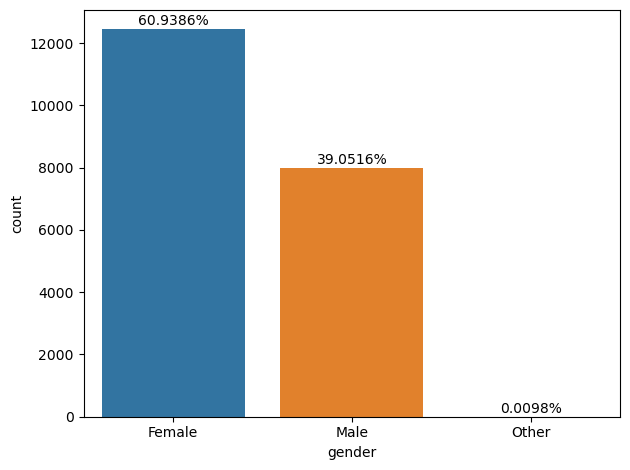

**************************************************


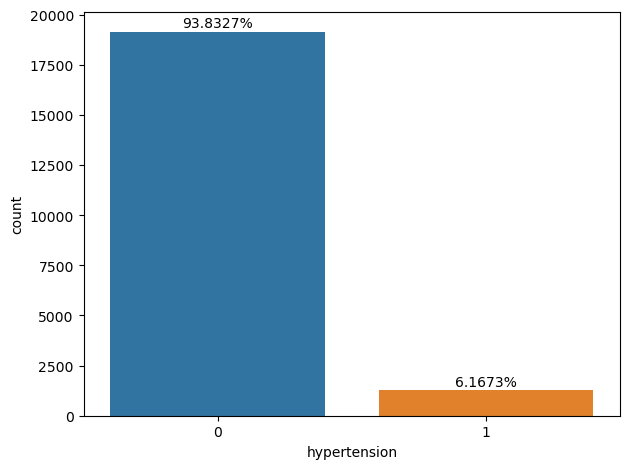

**************************************************


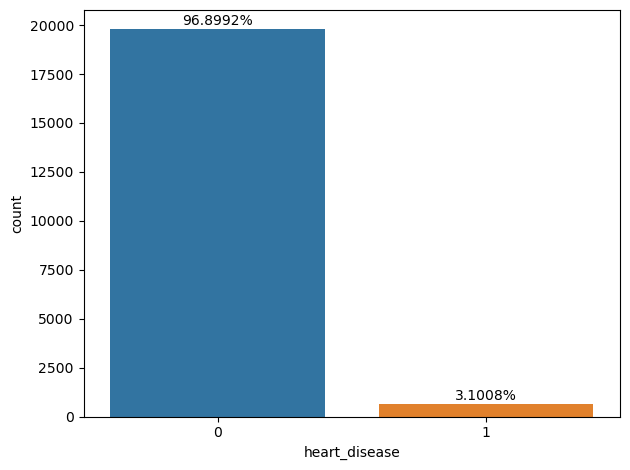

**************************************************


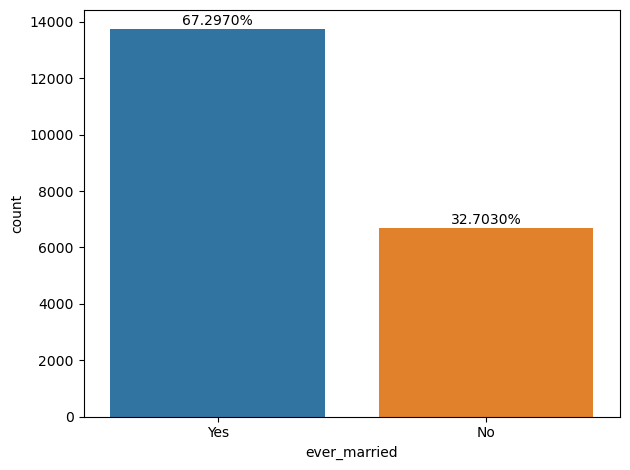

**************************************************


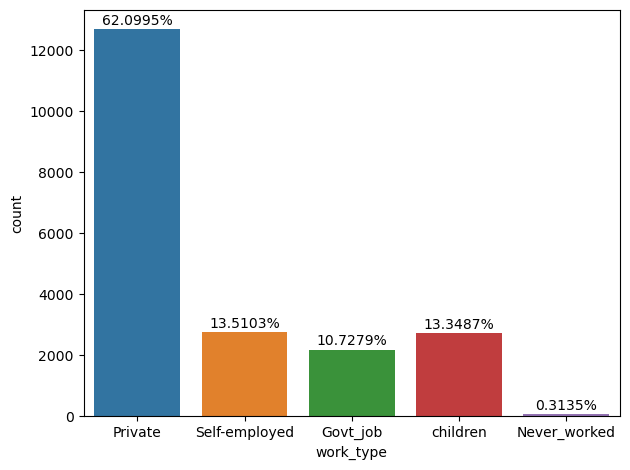

**************************************************


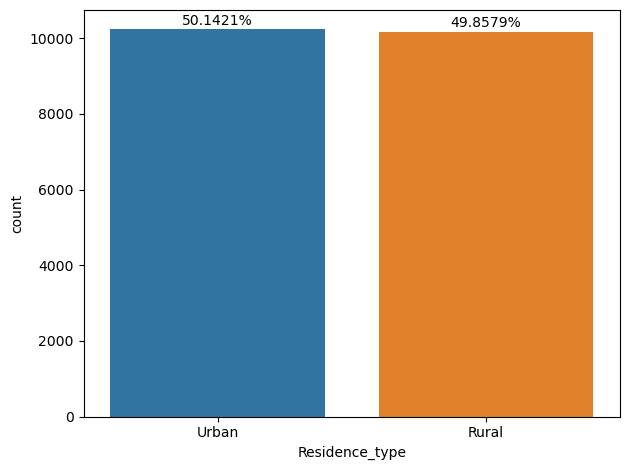

**************************************************


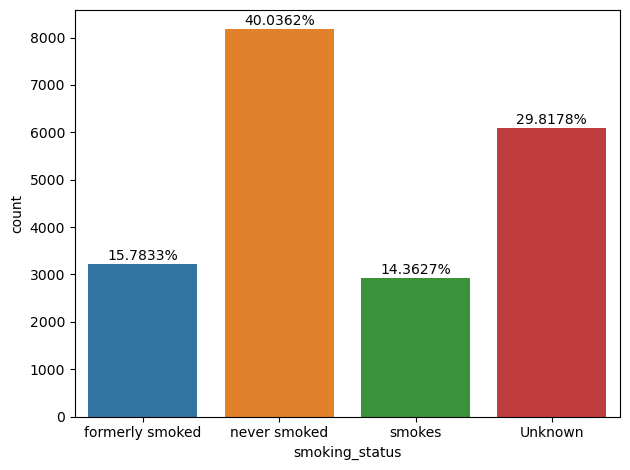

**************************************************


In [8]:
for col in categorical_col:
    ax = sns.countplot(x = col, data = data)
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.4f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.tight_layout()
    plt.show()
    print("*" * 50)

In [9]:
data["bmi"].interpolate(method="linear",inplace=True)

In [10]:
data=data.drop(columns=["Residence_type","work_type"])
data=pd.get_dummies(data,columns=["gender","smoking_status"])
int_marr={"ever_married":{"Yes":1,"No":0}}
data.replace(int_marr,inplace=True)

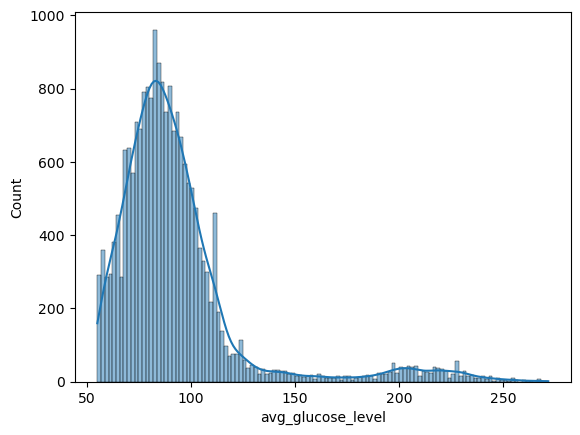

**************************************************


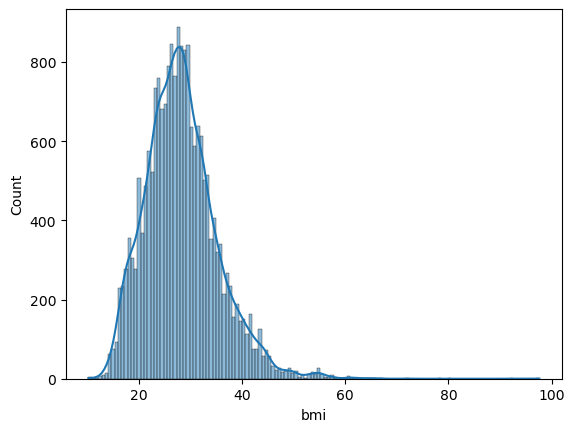

**************************************************


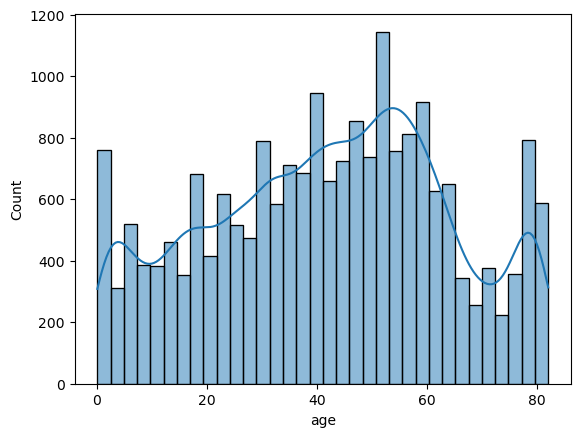

**************************************************


In [11]:
for col in numerical_col:
    sns.histplot(x = col, data = data, kde = True)
    plt.show()
    print("*" * 50)

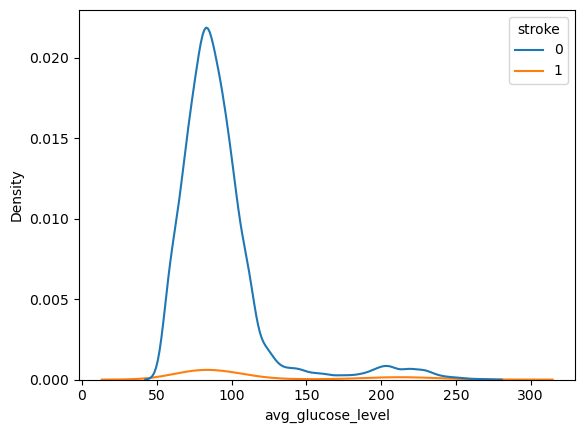

**************************************************


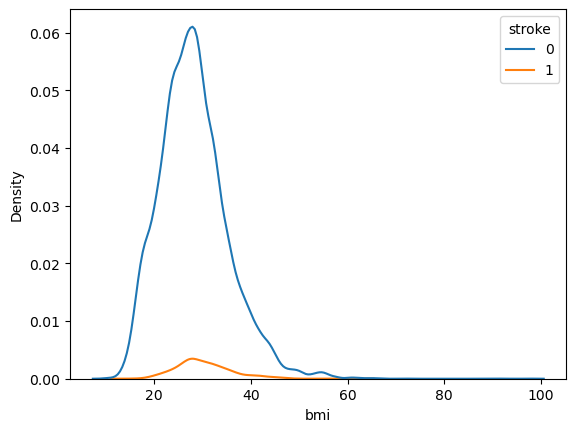

**************************************************


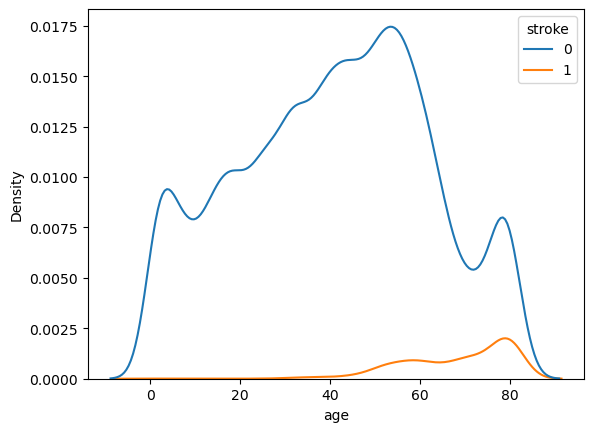

**************************************************


In [12]:
for col in numerical_col:
    sns.kdeplot(x = col, data = data, hue='stroke')
    plt.show()
    print("*" * 50)

In [13]:
titles=list(data.columns)
titles[0],titles[7]=titles[7],titles[0]
data=data[titles]
# this code is used to relocate the "stroke" so that its at the end of the data

In [14]:
y=data["stroke"]
x=data[["hypertension","bmi","heart_disease","gender_Female","gender_Male","gender_Other","ever_married","avg_glucose_level","age","smoking_status_Unknown","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]]

# scaling and fitting data

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.05,max_depth=2,min_samples_split=0.3,n_estimators=100,max_features=12)
gb.fit(Xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features=12,
                           min_samples_split=0.3)

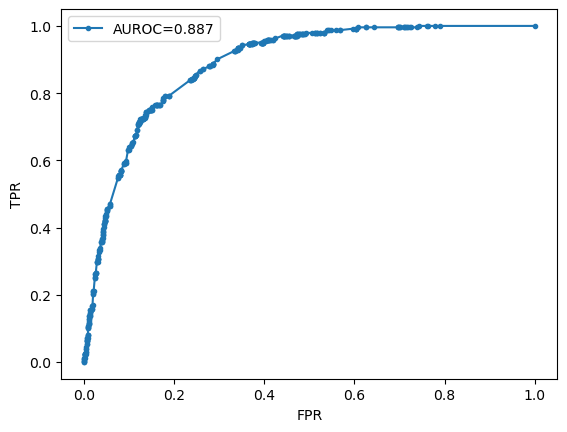

In [18]:
pred=gb.predict_proba(Xtest)
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred[:,1])
fpr,tpr,_=roc_curve(ytest,pred[:,1])
plt.plot(fpr,tpr,marker=".",label='AUROC=%0.3f'%auc)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


# predicting final results

In [19]:
testD=pd.read_csv("projectest.csv",index_col="id")
testD=testD.drop(columns=["Residence_type","work_type"])
testD=pd.get_dummies(testD,columns=["gender","smoking_status"])
testD["bmi"].interpolate(method="linear",inplace=True)
int_marr={"ever_married":{"Yes":1,"No":0}}
testD.replace(int_marr,inplace=True)

In [20]:
titles=list(testD.columns)
titles[0],titles[7]=titles[7],titles[0]
testD=testD[titles]
xt=testD[["hypertension","bmi","heart_disease","gender_Female","gender_Male","gender_Other","ever_married","avg_glucose_level","age","smoking_status_Unknown","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]]

In [21]:
xts=sc.transform(xt)

In [22]:
result=gb.predict_proba(xts)[:,1]


In [23]:
import scipy.stats as st
st.t.interval(0.90, len(result)-1, loc=np.mean(result), scale=st.sem(result))

(0.03925142651914428, 0.04126832662045917)

In [25]:
import csv
idr=testD.index
with open('project.csv','w+') as file:
    myfile=csv.writer(file)
    myfile.writerow(['id','stroke'])
    for i in range(len(idr)):
        myfile.writerow([idr[i],result[i]])